In [1]:
import pickle
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
import seaborn as sns
from statistics import stdev
from math import log
import numpy as np
from scipy import stats
from statistics import mean
%matplotlib inline


In [2]:
price_100_stan = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Initial\\Standard\\stan_total_price.p","rb"))
price_100_brute = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Policy\\Explicit\\brute_total_price_10_policy.p", "rb"))
price_100_net = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Policy\\Network\\total_price_10_policy.p", "rb"))

In [3]:
from collections import defaultdict

def make_distro(price_100):
    all_stds =[]
    total_log = defaultdict(list)
    for run, output in price_100.items(): 
        for step, prices in output.items():
            log_pr = [log(p) for p in prices]
            if len(log_pr) <2: 
                pass       
            else:     
                out = stdev(log_pr)
                total_log[run].append(out) 
                all_stds.append(out)
    return all_stds




In [4]:
price_stan = make_distro(price_100_stan)
price_brute = make_distro(price_100_brute)
price_net = make_distro(price_100_net)

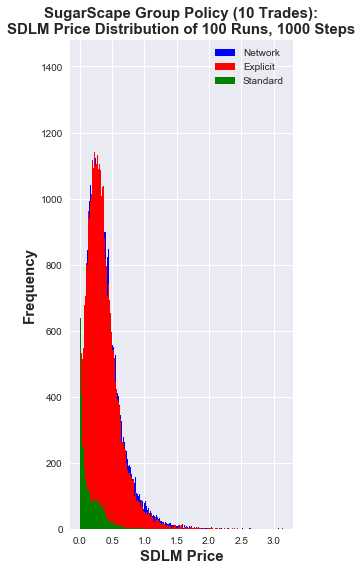

In [5]:
fig, ax = plt.subplots(figsize = (4,9))
ax.hist(price_net, 500, label = "Network", color='blue')
ax.hist(price_brute, 500, label = "Explicit", color = 'red')
ax.hist(price_stan, 500, label = "Standard", color ='green')
plt.title("SugarScape Group Policy (10 Trades):\nSDLM Price Distribution of 100 Runs, 1000 Steps", fontsize = 15, fontweight = "bold")
plt.xlabel("SDLM Price", fontsize = 15, fontweight = "bold")
plt.ylabel("Frequency", fontsize = 15, fontweight = "bold")
#plt.xlim(.75,2)
#plt.ylim(0,1000)
plt.legend()

In [6]:
## Calculate price

In [7]:
ind_stan = price_100_stan["Run42"]
ind_net = price_100_net["Run42"]
ind_brute = price_100_brute["Run42"]

In [8]:
def ind_price(ind_e):
    x = []
    y =[]
    for st, pr in ind_e.items(): 
        #if step <=400: 
            x.append(st)
            y.append(gmean(pr))
    return (x,y)
        


In [9]:
x_s, y_s = ind_price(ind_stan)
x_b, y_b = ind_price(ind_brute)
x_n, y_n = ind_price(ind_net)

(0, 3)

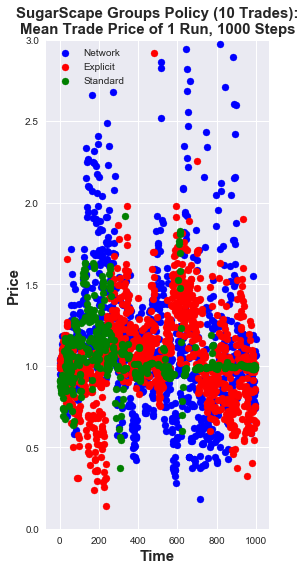

In [10]:
fig, ax = plt.subplots(figsize = (4,9))
ax.scatter(x_n, y_n, label = "Network", color='blue')
ax.scatter(x_b,y_b, label = "Explicit", color = 'red')
ax.scatter(x_s,y_s, label = "Standard", color ='green')
plt.title("SugarScape Groups Policy (10 Trades):\nMean Trade Price of 1 Run, 1000 Steps", fontsize = 15, fontweight = "bold")
plt.xlabel("Time", fontsize = 15, fontweight = "bold")
plt.ylabel("Price", fontsize = 15, fontweight = "bold")
plt.legend()
plt.ylim(0,3)

In [11]:
def ind_volume(ind_e):
    x_vol = []
    y_vol = []
    total = 0
    for s, p in ind_e.items(): 
        #if step <=400:

            x_vol.append(s)
            y_vol.append(len(p))
            total += len(p)
    return (x_vol, y_vol, total)

In [12]:
x_vol_stan, y_vol_stan, stan_vol = ind_volume(ind_stan)
x_vol_brute, y_vol_brute, brute_vol = ind_volume(ind_brute)
x_vol_net, y_vol_net, net_vol = ind_volume(ind_net)

In [13]:
len(y_vol_stan)

443

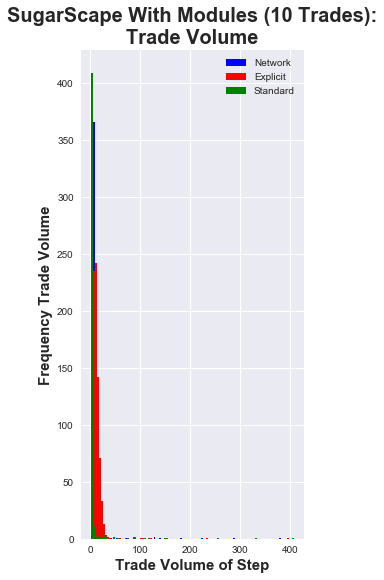

In [14]:
fig2, ax2 = plt.subplots(figsize = (4,9))
ax2.hist(y_vol_net, 100, label = "Network", color='blue')
ax2.hist(y_vol_brute, 100, label = "Explicit", color = 'red')
ax2.hist(y_vol_stan, 100, label = "Standard", color ='green')
plt.title("SugarScape With Modules (10 Trades):\nTrade Volume", fontsize = 20, fontweight = "bold")
plt.xlabel("Trade Volume of Step", fontsize = 15, fontweight = "bold")
plt.ylabel("Frequency Trade Volume", fontsize = 15, fontweight = "bold")
plt.legend()

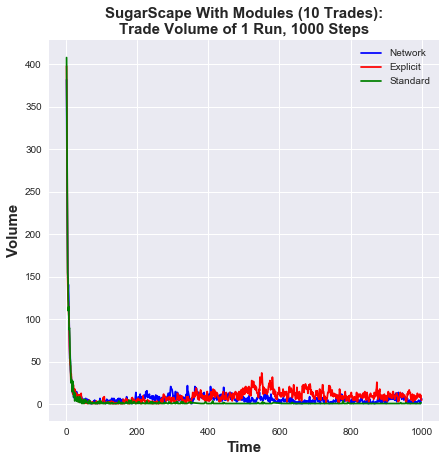

In [15]:
fig2, ax2 = plt.subplots(figsize = (7,7))
ax2.plot(x_vol_net, y_vol_net, label = "Network", color='blue')
ax2.plot(x_vol_brute, y_vol_brute, label = "Explicit", color = 'red')
ax2.plot(x_vol_stan, y_vol_stan, label = "Standard", color ='green')
plt.title("SugarScape With Modules (10 Trades):\nTrade Volume of 1 Run, 1000 Steps", fontsize = 15, fontweight = "bold")
plt.xlabel("Time", fontsize = 15, fontweight = "bold")
plt.ylabel("Volume", fontsize = 15, fontweight = "bold")
#ax2.text(600,300, "Total Trade Volume: \n "+str(total), fontsize = 15, fontweight = 'bold')
#plt.ylim(0,400)
plt.legend()

In [16]:

def sdlm(ind_e):
    x_dev =[]
    y_dev = []
    x_all = []
    y_all = []
    log_prices = {}
    for step, prices in ind_e.items(): 
        log_prices[step] = [abs(log(p)) for p in prices]
    for step, log_p in log_prices.items(): 
        #if step <= 400: 


            if len(log_p) <2: 
                pass       
            else: 
                for each in log_p: 
                    x_all.append(step)
                    y_all.append(each)

                x_dev.append(step)
                y_dev.append(stdev(log_p))
    return (x_dev, y_dev, x_all, y_all)
    


In [17]:
x_dev_stan, y_dev_stan, x_all_stan, y_all_stan = sdlm(ind_stan)
x_dev_brute, y_dev_brute, x_all_brute, y_all_brute = sdlm(ind_brute)
x_dev_net, y_dev_net, x_all_net, y_all_net = sdlm(ind_net)


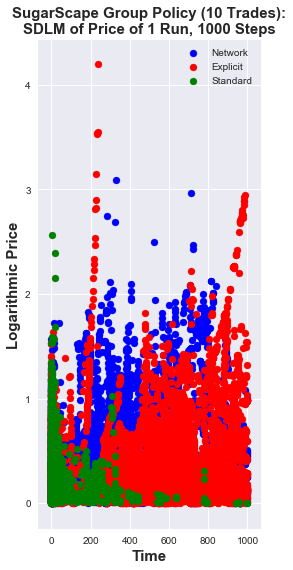

In [18]:
#from numpy.polynomial.polynomial import polyfit
fig3, ax3 = plt.subplots(figsize=(4,9))
#ax3.plot(x_dev_net, y_dev_net, label = "Network", color='blue')
#ax3.plot(x_dev_brute, y_dev_brute, label = "Explicit", color = 'red')
#ax3.plot(x_dev_stan, y_dev_stan, label = "Standard", color ='green')
ax3.scatter(x_all_net, y_all_net, label = "Network", color = 'blue')
ax3.scatter(x_all_brute, y_all_brute, label = "Explicit",color = 'red')
ax3.scatter(x_all_stan, y_all_stan,label = "Standard", color = 'green')
plt.title("SugarScape Group Policy (10 Trades):\nSDLM of Price of 1 Run, 1000 Steps", fontsize = 15, fontweight = "bold")
plt.xlabel("Time", fontsize = 15, fontweight = "bold")
plt.ylabel("Logarithmic Price", fontsize = 15, fontweight = "bold")
plt.legend()


In [19]:
stan_multi_s = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Initial\\Standard\\stan_multi_sur.p", "rb"))
stan_multi_t = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Initial\\Standard\\stan_multi_time.p", "rb"))
brute_multi_s = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Policy\\Explicit\\brute_multi_sur_10_policy.p", "rb"))
brute_multi_t = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Policy\\Explicit\\brute_multi_time_10_policy.p", "rb"))
net_multi_s = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Policy\\Network\\net_multi_sur_10_policy.p", "rb"))
net_multi_t =pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Policy\\Network\\net_multi_time_10_policy.p", "rb"))
net_mean = mean(net_multi_s)
brute_mean = mean(brute_multi_s)
stan_mean = mean(stan_multi_s)
net_time = round(mean(net_multi_t),2)
brute_time = round(mean(brute_multi_t),2)
stan_time = round(mean(stan_multi_t),2)


In [20]:


t, p = stats.ttest_ind(stan_multi_s,brute_multi_s)
brute_p = p * 2
t2,  p2 = stats.ttest_ind(stan_multi_s,net_multi_s)
net_p = p2 * 2
#t3, p3 = stats.ttest_ind(net_multi_s[0:35], stan_multi_s[0:35])
#alt_p = round(p3 *2, 8)
print ("Net-Stan t_test: ", net_p)
print ("Explixit_Stan t_test: ",brute_p)

Net-Stan t_test:  3.36205112848e-31
Explixit_Stan t_test:  1.76450510948e-28


Text(0,0.5,'Frequency')

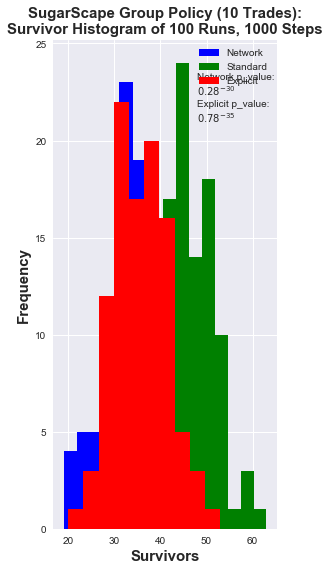

In [21]:
fig5, ax5 = plt.subplots(figsize=(4,9))
plt.hist(net_multi_s, label = "Network", color = 'blue')
plt.hist(stan_multi_s, label = "Standard", color = 'green')
plt.hist(brute_multi_s, label = "Explicit", color = 'red')
plt.text(48, 21, "Network p_value:\n"+ "$0.28^{-30}$" +"\nExplicit p_value:\n"+"$0.78^{-35}$")
plt.legend(loc = 1)
plt.title("SugarScape Group Policy (10 Trades):\nSurvivor Histogram of 100 Runs, 1000 Steps", fontweight = "bold", fontsize = 15)
plt.xlabel("Survivors", fontweight = "bold", fontsize = 15)
plt.ylabel("Frequency", fontweight = "bold", fontsize = 15)

In [22]:
t, p = stats.ttest_ind(stan_multi_t,brute_multi_t)
brute_t_p = (p * 2,10)
t2,  p2 = stats.ttest_ind(stan_multi_t,net_multi_t)
net_t_p = (p2 * 2, 10)
brute_t_p, net_t_p

((2.4462544902793602e-64, 10), (0.99306028002454894, 10))

Text(0,0.5,'Frequency')

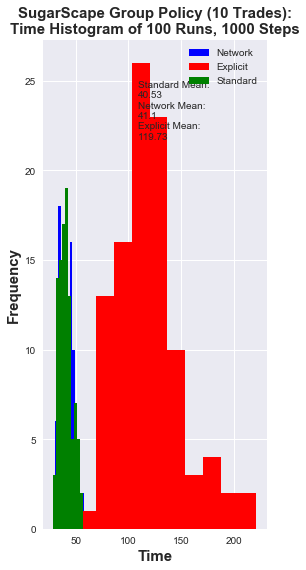

In [23]:
fig6, ax6 = plt.subplots(figsize=(4,9))

plt.hist(net_multi_t, label = "Network", color = 'blue')
plt.hist(brute_multi_t, label = "Explicit", color = 'red')
plt.hist(stan_multi_t, label = "Standard", color = 'green')
#plt.text(78, 25, "Network p-value: "+str(net_t_p) +"\nExplicit p-value: "+str(brute_t_p))
plt.legend(loc=1)
plt.title("SugarScape Group Policy (10 Trades):\nTime Histogram of 100 Runs, 1000 Steps", fontweight = "bold", fontsize = 15)
plt.text(109, 21.75, "\nStandard Mean:\n"+str(stan_time) + "\nNetwork Mean:\n"+str(net_time) +"\nExplicit Mean:\n"+str(brute_time))
plt.xlabel("Time", fontweight = "bold", fontsize = 15)
plt.ylabel("Frequency", fontweight = "bold", fontsize = 15)

## Meta Types

In [24]:
net_type_df = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Policy\\Network\\type_df_10_policy.p", "rb"))
brute_type_df =pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Policy\\Explicit\\brute_type_df_10_policy.p", "rb"))

In [25]:
def meta_plots(df):  
    consolidated = {}
    for run, steps in df.items():
        low_agents = []
        mid_agents = []
        high_agents = []
        indies = [] 
        for step, counts in steps.items(): 
            lows = 0
            highs = 0
            mids = 0
            for subs in counts[0]:
                if subs[1] == 'low focus':
                    lows += subs[2]
                elif subs[1] == "high focus":
                    highs += subs[2]
                elif subs[1] == "aggregate":
                    mids += subs[2]
            low_agents.append(lows)
            mid_agents.append(mids)
            high_agents.append(highs)      
            indies.append(counts[1])
        consolidated[run] = [low_agents, mid_agents, high_agents, indies]
    
    return consolidated

In [26]:
net_type_con = meta_plots(net_type_df)
brute_type_con = meta_plots(brute_type_df)

In [27]:
x = [i for i in range(1000)]


In [28]:
def type_hist(dict_type):
    high = []
    mid = []
    low = []
    inds = []
    for run, res in dict_type.items(): 
        high.append(res[0][-1])
        mid.append(res[1][-1])
        low.append(res[2][-1])
        inds.append(res[3][-1])
    return high, mid, low, inds
x = [i for i in range (100)]

In [29]:
#fnet_5_h, net_5_mid, net_5_low, net_5_inds = type_hist(net_type_con_5)
net_10_h, net_10_mid, net_10_low, net_10_inds = type_hist(net_type_con)
#b_5_h, b_5_mid, b_5_low, b_5_inds = type_hist(brute_type_con_5)
b_10_h, b_10_mid, b_10_low, b_10_inds = type_hist(brute_type_con)

Text(0,0.5,'Frequency of Type')

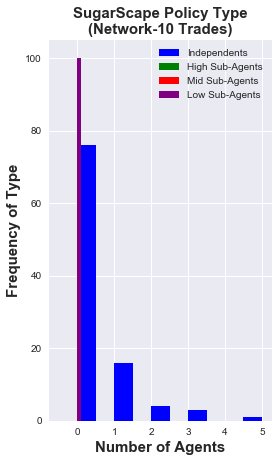

In [30]:
fig7, ax7 = plt.subplots(figsize=(4,7))

plt.hist(net_10_inds, label = 'Independents', color = "blue")
plt.hist(net_10_h, label = 'High Sub-Agents', color = 'green')
plt.hist(net_10_mid, label = 'Mid Sub-Agents', color = 'red')
plt.hist(net_10_low, label = 'Low Sub-Agents', color = 'purple')

plt.title("SugarScape Policy Type\n(Network-10 Trades)", fontweight = "bold", fontsize = 15)
plt.legend()
plt.xlabel("Number of Agents", fontweight = "bold", fontsize = 15)
plt.ylabel("Frequency of Type", fontweight = "bold", fontsize = 15)


Text(0,0.5,'Frequency of Type')

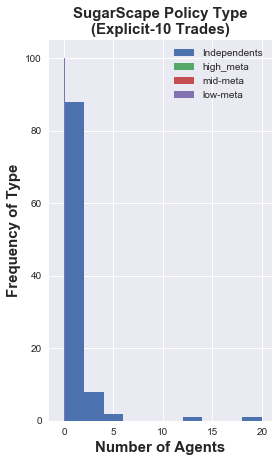

In [31]:
fig7, ax7 = plt.subplots(figsize=(4,7))

plt.hist(b_10_inds, label = 'Independents')
plt.hist(b_10_h, label = 'high_meta')
plt.hist(b_10_mid, label = 'mid-meta')
plt.hist(b_10_low, label = 'low-meta')

plt.title("SugarScape Policy Type\n(Explicit-10 Trades)", fontweight = "bold", fontsize = 15)
plt.legend()
plt.xlabel("Number of Agents", fontweight = "bold", fontsize = 15)
plt.ylabel("Frequency of Type", fontweight = "bold", fontsize = 15)